# Working with Raster Bands

## Preparing Your Workspace

### Option 1: (recommended) Run in Google Colab
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](TBD)

### Option 2: Run local Jupyter instance
You can also choose to open this Notebook in your own local Jupyter instance.

**Prerequisites**

- Install: rasterio library
- Download example data: TBD

In [ ]:
!pip install rasterio
!wget TBD

In [1]:
import rasterio

In [4]:
image_path = 'data/batch_001/8928dec4ddbffff/DJI_0876.JPG'

### Examining Metadata

In [49]:
# Open the image
with rasterio.open(image_path) as src:
    # Image's metadata
    print('Metadata:', src.profile)
    # Image's bands
    print('Bands:', src.count)
    # Image's projection
    print('Projection:', src.crs)
    # Image's bounds
    print('Bounds:', src.bounds)


Metadata: {'driver': 'JPEG', 'dtype': 'uint8', 'nodata': None, 'width': 4000, 'height': 3000, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockysize': 1, 'tiled': False, 'compress': 'jpeg', 'interleave': 'pixel', 'photometric': 'ycbcr'}
Bands: 3
Projection: None
Bounds: BoundingBox(left=0.0, bottom=3000.0, right=4000.0, top=0.0)


/Users/kevinlacaille/.pyenv/versions/3.11.4/envs/scipy2024-env/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Because this image doesn't have a known projection, we'll do everything in the pixel reference system.

### Decomposing an Image

In [54]:
# Open the image and read the bands as numpy arrays
with rasterio.open(image_path) as src:
    blue = src.read(1)
    green = src.read(2)
    red = src.read(3)

/Users/kevinlacaille/.pyenv/versions/3.11.4/envs/scipy2024-env/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [53]:
# Print the blue band's data
print(blue)
# Print data type of the blue band
print('Data type:', blue.dtype)
print('Min:', blue.min())  #0
print('Max:', blue.max())  #2^8 - 1 = 255 (8-bit image)

[[ 91 101  85 ... 145 199 233]
 [ 97 102  82 ... 144 227 236]
 [ 90  92  90 ... 191 233 236]
 ...
 [216 195 108 ...  79  78  67]
 [203 158 118 ...  74  82  77]
 [142 151 150 ...  75  79  73]]
Data type: uint8
Min: 0
Max: 255


Visualize all 3 bands: Red, Green, Blue

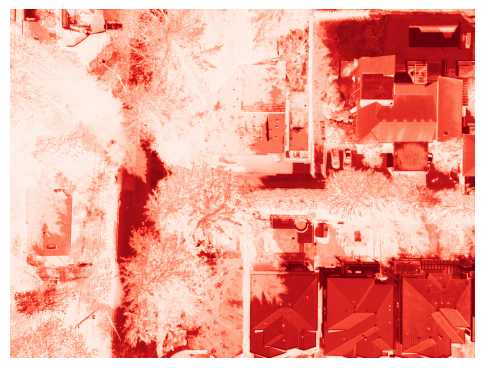

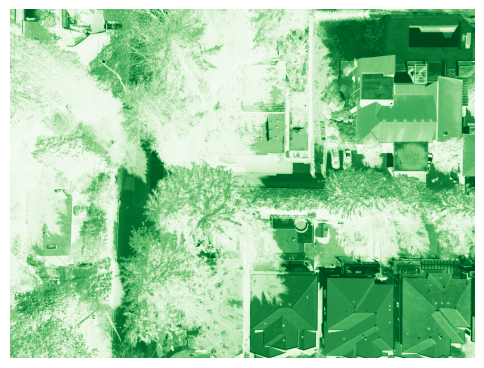

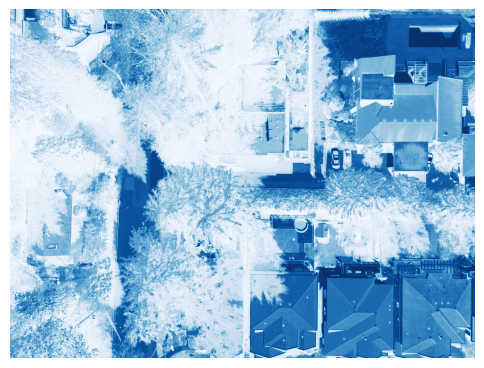

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(red, cmap='Reds')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(green, cmap='Greens')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(blue, cmap='Blues')
plt.axis('off')
plt.show()


### Composing a Scene

In [60]:
import numpy as np

# Stack the bands to create a color image
rgb = np.dstack((blue, green, red))

print('RGB shape:', rgb.shape)

RGB shape: (3000, 4000, 3)


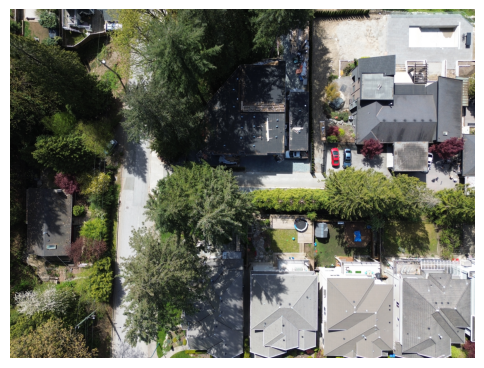

In [61]:
# Visualize the color image
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.axis('off')
plt.show()